#Pertemuan 4

#Library

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Dataset

In [ ]:
# data tabular
df = pd.DataFrame(
    {
        "ID Buah": pd.Series([1,2,3,4,5]),
        "Diameter": pd.Series([7.0,7.1,6.5,6.6,6.8]),
        "Berat": pd.Series([165,170,180,195,200])
    }
)

In [ ]:
df

,ID Buah,Diameter,Berat
0,1,7.0,165
1,2,7.1,170
2,3,6.5,180
3,4,6.6,195
4,5,6.8,200


#Algoritma K-Means

In [ ]:
# pemilihan feature
df_train = df.drop("ID Buah", axis = 1)
df_train

,Diameter,Berat
0,7.0,165
1,7.1,170
2,6.5,180
3,6.6,195
4,6.8,200


In [ ]:
# labeling berdasarkan jumlah kluster (n=2)
n = 2
kmeans_model = KMeans(n_clusters =n, n_init=1, random_state=100).fit(df_train)

In [ ]:
# pelabuhan cluster
df["kluster"] = kmeans_model.labels_
df

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,1
3,4,6.6,195,1
4,5,6.8,200,1


In [ ]:
# hasil dari update centroid
print(kmeans_model.cluster_centers_)

[[  7.05       167.5       ]
 [  6.63333333 191.66666667]]


#Tantangan dari algoritma K-Means

Limitasi atau tantangan dari algoritma k-means adalah menentukan nilai centroid diawal dan jumlah kluster yang manual, sehingga perlu ada mekanisme/metode tertentu untuk memilih centroid diawal dan jumlah kluster

#Pemilihan centroid awal 


*   Menggunakan pengaturan parameter yang ada di sklearn
*   Lebih lengkapnya bisa baca di dokumentasinya https://sckit-learn.org/table/modules/generated/sklearn.cluster.KMeans.html



In [ ]:
kmeans_model_2 = KMeans(n_clusters=2, n_init="auto").fit(df_train)
df2 = df.copy()
df2["kluster"] = kmeans_model_2.labels_
df2

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,1
1,2,7.1,170,1
2,3,6.5,180,1
3,4,6.6,195,0
4,5,6.8,200,0


#Pemilihan jumlah kluster


*   Menggunakan metode elbow
*   Library nya bisa apa saja, contoh disini menggunakan library scikit yellowbrick cluster https://sckit-learn.yb.org/en/latest/api/cluster/elbow.html



In [ ]:
# standarisasi terlebih dahulu dalam bentuk array
x_array = np.array(df_train)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=4, n_init=1, random_state=100),
                 k=(1, 5))>

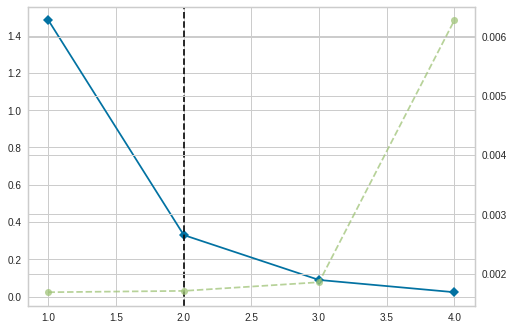

In [ ]:
km = KMeans(n_init=1, random_state=100)
visualizer = KElbowVisualizer(km, k=(1,5), timing=True)
visualizer.fit(x_scaled)
visualizer.show

# Tugas
*   Gunakan data dari url ini https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv
*Hasil bisa berbeda tergantung pengolahan data, pemilihan nilai centroid diawal dan jumlah kluster
*Yang menjadi penilaian adalah proses coding dari mulai pengambilan data, pengolahan data, hingga penerapan algoritma k-means


In [ ]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv")

In [ ]:
df_rawTrain = df_raw.dropna()
df_rawTrain

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass
5,2022041106,85,95.0,34.0,73.0,57.0,98,not pass
6,2022041107,95,79.0,52.0,54.0,85.0,13,not pass
...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,not pass
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass


In [ ]:
df_rawTrain["activeness_score"] = df_rawTrain["activeness_score"].map(lambda x : np.nan if x < 0 or x > 100 else x)

In [ ]:
# df_rawTrain = df_rawTrain.drop()
df_rawTrain

,npm,activeness_score,assignment_score,midterm_test_score,end_semester_test_score,Kluster
0,2022041101,99.0,71.0,44.0,24,0
2,2022041103,86.0,71.0,21.0,41,0
4,2022041105,93.0,85.0,44.0,50,0
5,2022041106,85.0,95.0,57.0,98,0
6,2022041107,95.0,79.0,85.0,13,0
...,...,...,...,...,...,...
366,2022041467,88.0,75.0,55.0,82,7
368,2022041469,96.0,87.0,95.0,11,7
369,2022041470,NaN,83.0,86.0,13,4
370,2022041471,84.0,92.0,42.0,27,7


In [ ]:
df_rawTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 371
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   npm                      312 non-null    int64  
 1   activeness_score         312 non-null    int64  
 2   assignment_score         312 non-null    float64
 3   pre_test_score           312 non-null    float64
 4   post_test_score          312 non-null    float64
 5   midterm_test_score       312 non-null    float64
 6   end_semester_test_score  312 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 19.5 KB


In [ ]:
kmeans_means = KMeans(n_clusters = 8, n_init = 1, random_state = 100).fit(df_rawTrain)

In [ ]:
df_rawTrain['Kluster'] = kmeans_means.labels_
df_rawTrain

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,Kluster
0,2022041101,99,71.0,93.0,52.0,44.0,24,0
2,2022041103,86,71.0,84.0,17.0,21.0,41,0
4,2022041105,93,85.0,68.0,29.0,44.0,50,0
5,2022041106,85,95.0,34.0,73.0,57.0,98,0
6,2022041107,95,79.0,52.0,54.0,85.0,13,0
...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,7
368,2022041469,96,87.0,55.0,56.0,95.0,11,7
369,2022041470,569,83.0,89.0,15.0,86.0,13,4
370,2022041471,84,92.0,87.0,97.0,42.0,27,7


In [ ]:
print(kmeans_means.cluster_centers_)

[[2.02204113e+09 9.05111111e+01 8.35333333e+01 5.28000000e+01
  5.22000000e+01 5.60666667e+01 4.23555556e+01]
 [2.02204134e+09 9.07674419e+01 8.57906977e+01 6.21860465e+01
  7.21627907e+01 6.72558140e+01 6.36976744e+01]
 [2.02204126e+09 9.06052632e+01 8.63947368e+01 7.35526316e+01
  5.01578947e+01 4.43421053e+01 7.43947368e+01]
 [2.02204119e+09 9.26600000e+01 8.24600000e+01 6.41400000e+01
  4.82600000e+01 5.26800000e+01 6.05600000e+01]
 [2.02204147e+09 4.78000000e+02 8.30000000e+01 8.05000000e+01
  5.00000000e+01 7.05000000e+01 2.25000000e+01]
 [2.02204139e+09 8.98936170e+01 8.38510638e+01 5.45957447e+01
  3.15531915e+01 5.26595745e+01 6.35957447e+01]
 [2.02204127e+09 9.05714286e+01 8.78857143e+01 3.62857143e+01
  5.24857143e+01 5.42000000e+01 1.79428571e+01]
 [2.02204144e+09 8.33076923e+01 8.65961538e+01 5.93076923e+01
  6.30961538e+01 4.83461538e+01 5.12692308e+01]]


In [ ]:
df_rawTrain['Kluster'].value_counts()

7    52
3    50
5    47
0    45
1    43
2    38
6    35
4     2
Name: Kluster, dtype: int64

* Jumlah Data : 312
* Jumlah Cluster : 8
* Jumlah Data Cluster 0 : 45
* Jumlah Data Cluster 1 : 43
* Jumlah Data Cluster 2 : 38
* Jumlah Data Cluster 3 : 50
* Jumlah Data Cluster 4 : 2
* Jumlah Data Cluster 5 : 47
* Jumlah Data Cluster 6 : 35 
* Jumlah Data Cluster 7 : 52